# Analysis of super store data set, by Heynce Saraf


In [1]:
#importing of packages.
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import seaborn as sbn 
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler
import colorama
from colorama import Fore, Style
import scipy.stats as sm
import pylab as py
import plotly.express as px
import plotly.graph_objects as go



In [2]:
os.getcwd()

'/Users/heyncesaraf/Desktop/dublin coding/python'

In [3]:
df = pd.read_csv("/Users/heyncesaraf/Desktop/dublin coding/python/Data sets/Sample - EU Superstore.csv")

# Info about the DataSet.

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1774 to 163
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10000 non-null  int64         
 1   Order ID       10000 non-null  object        
 2   Order Date     10000 non-null  object        
 3   Ship Date      10000 non-null  object        
 4   Ship Mode      10000 non-null  object        
 5   Customer ID    10000 non-null  object        
 6   Customer Name  10000 non-null  object        
 7   Segment        10000 non-null  object        
 8   City           10000 non-null  object        
 9   State          10000 non-null  object        
 10  Country        10000 non-null  object        
 11  Region         10000 non-null  object        
 12  Product ID     10000 non-null  object        
 13  Category       10000 non-null  object        
 14  Sub-Category   10000 non-null  object        
 15  Product Name   100

In [5]:
df.describe()

Row ID         Sales      Quantity      Discount        Profit
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000
mean    5000.50000    293.808906      3.777300      0.103105     37.282974
std     2886.89568    486.055635      2.203268      0.174782    178.100384
min        1.00000      2.955000      1.000000      0.000000  -3059.820000
25%     2500.75000     49.462500      2.000000      0.000000      1.320000
50%     5000.50000    119.355000      3.000000      0.000000     14.220000
75%     7500.25000    320.708625      5.000000      0.100000     48.510000
max    10000.00000   7958.580000     14.000000      0.850000   3979.080000

# number of rows and column

In [6]:
print('\033[1m' 'Number of rows and column :', df.shape)


Number of rows and column : (10000, 20)


# Description of Date Set.

In [7]:
df.describe(include=object)


Order ID Order Date Ship Date       Ship Mode Customer ID  \
count             10000      10000     10000           10000       10000   
unique             4593       1254      1366               4         795   
top     ES-2015-5776825   04/08/15  16/08/17  Standard Class    BC-11125   
freq                 12         34        34            6054          37   

        Customer Name   Segment    City    State Country   Region  \
count           10000     10000   10000    10000   10000    10000   
unique            795         3    1069      127      15        3   
top     Becky Castell  Consumer  London  England  France  Central   
freq               37      5186     257     1499    2827     5822   

             Product ID         Category Sub-Category  \
count             10000            10000        10000   
unique             1915                3           17   
top     OFF-AR-10003651  Office Supplies          Art   
freq                 29             6589         1434   

                         Product Name  
count                           10000  
unique                           1856  
top     Eldon File Cart, Single Width  
freq                               30

In [8]:
#head
df.head(15).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'green','border': '3px solid',                       
                                    'border-color': 'black','font-weight': 'bold'}) # using 'border color' seperately also works.

In [9]:
#tail
df.tail().style.set_properties(**{'background-color': 'white','border': '3px solid green',                                                   
                                    'color': 'darkred',"font-size": "11px",'font-weight': 'bold'})

# checking for null values

In [10]:
df.isnull() # couldnt use style here, as it freezed and or didnt finish till the end.

Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
0      False     False       False      False      False        False   
1      False     False       False      False      False        False   
2      False     False       False      False      False        False   
3      False     False       False      False      False        False   
4      False     False       False      False      False        False   
...      ...       ...         ...        ...        ...          ...   
9995   False     False       False      False      False        False   
9996   False     False       False      False      False        False   
9997   False     False       False      False      False        False   
9998   False     False       False      False      False        False   
9999   False     False       False      False      False        False   

      Customer Name  Segment   City  State  Country  Region  Product ID  \
0             False    False  False  False    False   False       False   
1             False    False  False  False    False   False       False   
2             False    False  False  False    False   False       False   
3             False    False  False  False    False   False       False   
4             False    False  False  False    False   False       False   
...             ...      ...    ...    ...      ...     ...         ...   
9995          False    False  False  False    False   False       False   
9996          False    False  False  False    False   False       False   
9997          False    False  False  False    False   False       False   
9998          False    False  False  False    False   False       False   
9999          False    False  False  False    False   False       False   

      Category  Sub-Category  Product Name  Sales  Quantity  Discount  Profit  
0        False         False         False  False     False     False   False  
1        False         False         False  False     False     False   False  
2        False         False         False  False     False     False   False  
3        False         False         False  False     False     False   False  
4        False         False         False  False     False     False   False  
...        ...           ...           ...    ...       ...       ...     ...  
9995     False         False         False  False     False     False   False  
9996     False         False         False  False     False     False   False  
9997     False         False         False  False     False     False   False  
9998     False         False         False  False     False     False   False  
9999     False         False         False  False     False     False   False  

[10000 rows x 20 columns]

In [11]:
df.describe().style.set_properties(**{'background-color': 'white','border': '5px solid green',                          
                                    'color': 'darkblue','font-weight': 'bold'})



In [12]:
for col in df.columns:
    print('\033[1m',"\x1b[32m",col)

  Row ID
  Order ID
  Order Date
  Ship Date
  Ship Mode
  Customer ID
  Customer Name
  Segment
  City
  State
  Country
  Region
  Product ID
  Category
  Sub-Category
  Product Name
  Sales
  Quantity
  Discount
  Profit


In [13]:
df.count()


Row ID           10000
Order ID         10000
Order Date       10000
Ship Date        10000
Ship Mode        10000
Customer ID      10000
Customer Name    10000
Segment          10000
City             10000
State            10000
Country          10000
Region           10000
Product ID       10000
Category         10000
Sub-Category     10000
Product Name     10000
Sales            10000
Quantity         10000
Discount         10000
Profit           10000
dtype: int64

In [14]:
print('\033[1m',"\x1b[32m", df.columns.values)

  ['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'City' 'State' 'Country' 'Region' 'Product ID'
 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity' 'Discount'
 'Profit']


In [15]:
print('\033[1m',"\x1b[34m", df.columns)

  Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [16]:
print('\033[1m',"\x1b[32m", sorted(df))


  ['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Discount', 'Order Date', 'Order ID', 'Product ID', 'Product Name', 'Profit', 'Quantity', 'Region', 'Row ID', 'Sales', 'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category']


# countries and its sales.

In [17]:
print('\033[1m',"\x1b[32m",df.groupby(['Country'])['Sales'].sum())

  Country
Austria            81162.0000
Belgium            49226.7000
Denmark             8638.0530
Finland            20704.3500
France            858931.0830
Germany           628840.0305
Ireland            16639.5090
Italy             289709.6580
Netherlands        77514.9450
Norway             20525.3700
Portugal           15105.1200
Spain             287146.6800
Sweden             30491.4030
Switzerland        24877.8600
United Kingdom    528576.3000
Name: Sales, dtype: float64


# Names of states(unique names).

In [18]:
print('\033[1m',"\x1b[32m" , df['State'].unique())

  ['England' 'Aquitaine-Limousin-Poitou-Charentes'
 'Alsace-Champagne-Ardenne-Lorraine' 'North Rhine-Westphalia'
 'Ile-de-France' 'Hesse' 'Lombardy' 'Brandenburg' 'Baden-Württemberg'
 'Catalonia' 'Castile-La Mancha' 'Thuringia' 'South Holland'
 'Rhineland-Palatinate' 'Stockholm' 'Murcia' 'Madrid' 'Lazio'
 'Bourgogne-Franche-Comté' 'Limburg' 'Vienna' 'Normandy' 'Bavaria'
 'Auvergne-Rhône-Alpes' 'Hamburg' "Provence-Alpes-Côte d'Azur"
 'Emilia-Romagna' 'Namur' 'Campania' 'Scotland' 'Hauts-de-France' 'Cork'
 'Cantabria' 'Lisboa' 'Berlin' 'Andalusía' 'Brittany' 'North Brabant'
 'North Holland' 'Basque Country' 'Wales' 'Lower Saxony' 'Apulia'
 'Languedoc-Roussillon-Midi-Pyrénées' 'Castile and León' 'Piedmont'
 'Pays de la Loire' 'Saxony' 'Uppsala' 'Sicily' 'Balearic Islands'
 'Upper Austria' 'Salzburg' 'Valenciana' 'Trentino-Alto Adige' 'Värmland'
 'Centre-Val de Loire' 'Finland Proper' 'Drenthe' 'Veneto' 'Gelderland'
 'Sardinia' 'South Denmark' 'Tuscany' 'Porto' 'Rogaland'
 'Mecklenburg-Vor

In [19]:
print('\033[1m' "Total number of unique state's name:""\x1b[34m",len(df['State'].unique()))

Total number of unique state's name: 127


# Total city count.

In [20]:
print('\033[1m' , len(df['City'].unique()))

 1069


In [21]:
print('\033[1m' , df['City'].unique())

 ['Leeds' 'West Bromwich' 'Le Bouscat' ... 'Gandia' 'Vigevano'
 'Les Clayes-sous-Bois']


# Total number of customers.

In [22]:
print('\033[1m' 'Total number of customers:' "\x1b[34m",len(df['Customer ID']))

Total number of customers: 10000


# Total number of Products.

In [23]:
print('\033[1m' "Total number of unique Product's name:" "\x1b[34m",len(df["Product Name"].unique()))

Total number of unique Product's name: 1856


# Product Details

In [24]:
print('\033[1m',"\x1b[32m" , df['Sub-Category'].value_counts())


  Art            1434
Binders        1317
Storage        1311
Phones          570
Bookcases       484
Copiers         465
Chairs          465
Furnishings     461
Labels          454
Accessories     452
Supplies        444
Paper           443
Envelopes       441
Fasteners       433
Machines        423
Appliances      312
Tables           91
Name: Sub-Category, dtype: int64


In [25]:
def ones(x):
    return 1
df['Row ID'] = df['Row ID'].apply(ones)

In [26]:
fig = px.sunburst(data_frame = df[['Category','Sub-Category','Row ID']].groupby(['Category','Sub-Category'])
                  .sum().reset_index(),
                                      path=['Category', 'Sub-Category'], 
                                      values='Row ID', title='Frequency of category occurences.',
                  color_discrete_sequence=px.colors.sequential.Electric)
fig.show()

In [27]:
fig = px.sunburst(data_frame = df[['Category','Product Name','Row ID']].
                  groupby(['Category','Product Name']).sum().reset_index().sort_values
                  ('Row ID',ascending=True).head(40), path=['Category', 'Product Name'], 
                  values='Row ID',
                  width=900, height=950, 
                  title="Top 40 products and their distribution acorss categories",
                  color_discrete_sequence=px.colors.sequential.Inferno)
fig.show()

In [28]:
print('\033[1m',"\x1b[32m",df['Product Name'].value_counts())


  Eldon File Cart, Single Width             30
Sanford Pencil Sharpener, Water Color     27
Rogers File Cart, Single Width            27
Stanley Pencil Sharpener, Water Color     25
Ibico Index Tab, Clear                    24
                                          ..
Fiskars Letter Opener, Steel               1
Barricks Conference Table, Rectangular     1
Deflect-O Frame, Duo Pack                  1
Hamilton Beach Stove, Black                1
Hoover Refrigerator, White                 1
Name: Product Name, Length: 1856, dtype: int64


# Sales, Profits/Losses, Discounts.

In [98]:
print('\033[1m''Number of customer in each country :')
print('\033[1m',"\x1b[32m",df.groupby(['Country'])['Row ID'].sum()) 

Number of customer in each country :
  Country
Austria            270
Belgium            147
Denmark             65
Finland             64
France            2827
Germany           2065
Ireland            106
Italy             1108
Netherlands        435
Norway              70
Portugal            70
Spain              859
Sweden             203
Switzerland         78
United Kingdom    1633
Name: Row ID, dtype: int64


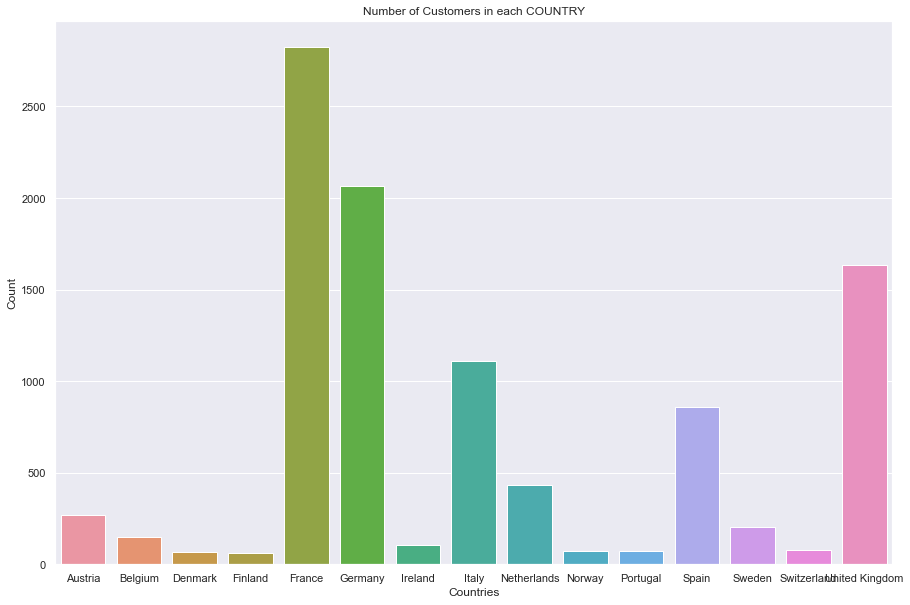

In [157]:
plt.figure(figsize = (15,10))

Product = df.groupby('Country').size().to_frame(name = "count").reset_index()
sbn.barplot(y = 'count', x='Country', data = Product )

plt.title("Number of Customers in each COUNTRY")
plt.xlabel("Countries")
plt.ylabel("Count")

plt.show()

<AxesSubplot:>

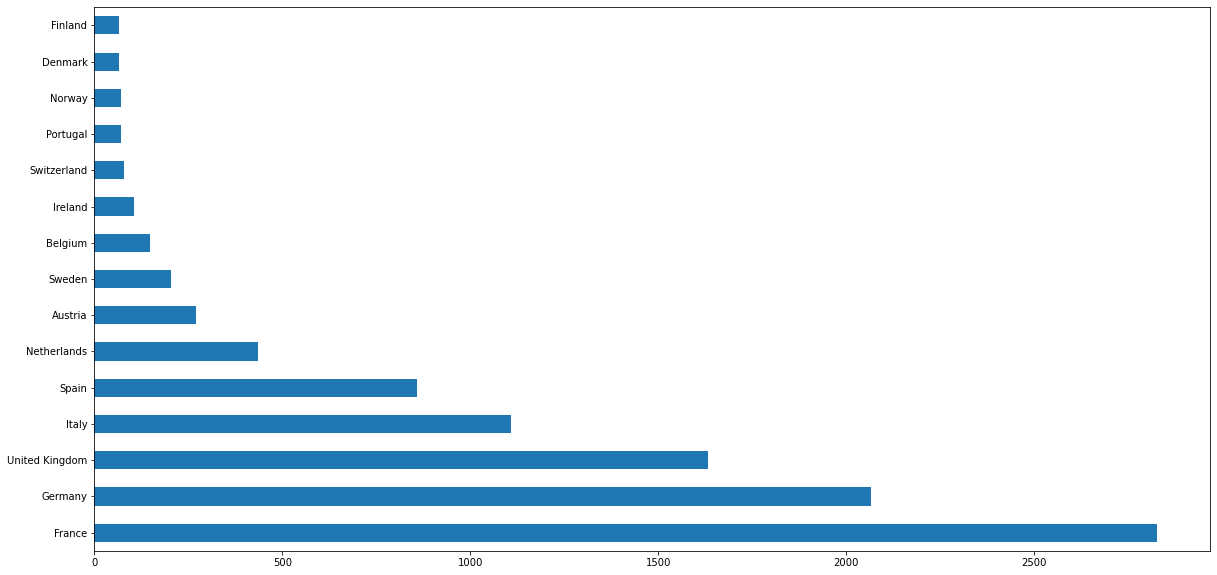

In [29]:
df['Country'].value_counts().plot(kind='barh',figsize=(20,10))


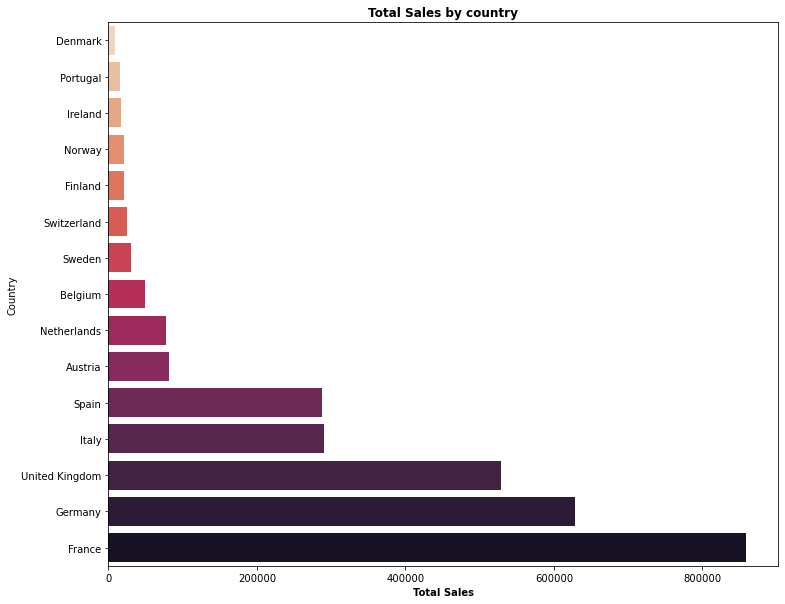

In [30]:
figure = plt.figure(figsize=(12,10))

grouped_df = df.groupby('Country').sum()[['Sales']].reset_index().sort_values(by='Sales', ascending=True)
g = sbn.barplot(x='Sales', y='Country', data=grouped_df, palette='rocket_r')
g.set_title('Total Sales by country',fontweight="bold")
g.set_xlabel('Total Sales',fontweight="bold")
plt.show(g)

In [31]:
conda install -c r r-ibmsunburst


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions

Package ncurses conflicts for:
python=3.9 -> ncurses[version='>=6.2,<7.0a0|>=6.3,<7.0a0']
python=3.9 -> readline[version='>=8.0,<9.0a0'] -> ncurses[version='>=6.1,<7.0a0']
r-ibmsunburst -> r-base[version='>=3.6,<3.7.0a0'] -> ncurses[version='>=6.1,<7.0a0']


Note: you may need to restart the kernel to use updated packages.


In [44]:
import inspect

colorscale_names = []
colors_modules = ['carto', 'colorbrewer', 'cmocean', 'cyclical',
                    'diverging', 'plotlyjs', 'qualitative', 'sequential']
for color_module in colors_modules:
    colorscale_names.extend([name for name, body
                            in inspect.getmembers(getattr(px.colors, color_module))
                            if isinstance(body, list)])

In [45]:
from textwrap import fill

print(fill(''.join(sorted({f'{x: <{15}}' for x in colorscale_names})), 75))

Accent         Accent_r       Aggrnyl        Aggrnyl_r      Agsunset
Agsunset_r     Alphabet       Alphabet_r     Antique        Antique_r
Armyrose       Armyrose_r     Blackbody      Blackbody_r    Bluered
Bluered_r      Blues          Blues_r        Blugrn         Blugrn_r
Bluyl          Bluyl_r        Bold           Bold_r         BrBG
BrBG_r         Brwnyl         Brwnyl_r       BuGn           BuGn_r
BuPu           BuPu_r         Burg           Burg_r         Burgyl
Burgyl_r       Cividis        Cividis_r      D3             D3_r
Dark2          Dark24         Dark24_r       Dark2_r        Darkmint
Darkmint_r     Earth          Earth_r        Edge           Edge_r
Electric       Electric_r     Emrld          Emrld_r        Fall
Fall_r         G10            G10_r          Geyser         Geyser_r
GnBu           GnBu_r         Greens         Greens_r       Greys
Greys_r        HSV            HSV_r          Hot            Hot_r
IceFire        IceFire_r      Inferno        Inferno_r    

In [34]:
print(df[['State','Sales']])

        State   Sales
0     England   79.20
1     England  388.92
2     England   35.19
3     England   50.94
4     England  307.44
...       ...     ...
9995   Veneto   59.82
9996  Hamburg    6.66
9997  Hamburg   96.66
9998  Hamburg  502.95
9999  Hamburg  152.28

[10000 rows x 2 columns]


# MAX/MIN, Sales and Profit, according to countries.

In [36]:
df.groupby('Country').sum('Profit').style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'black','border': '3px solid',                       
                                    'border-color': 'black','font-weight': 'bold'}).highlight_max(color = 'green').highlight_min(color = 'red')

Text(0.5, 1.0, 'Sales VS Profit')

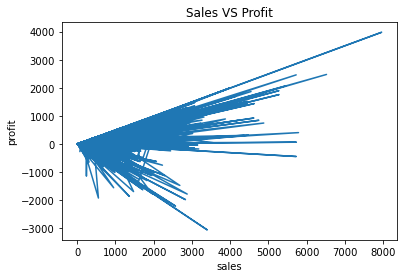

In [37]:
Sales = df['Sales']
Profit = df['Profit']
plt.plot(Sales,Profit)
plt.xlabel('sales')
plt.ylabel('profit')
plt.title('Sales VS Profit') #strange, chanding the heading, changed the color of the lines.

In [38]:
top_prod = df.groupby('State').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(20)
fig = px.pie(top_prod, values='total', names='State', 
             color_discrete_sequence=px.colors.sequential.Hot, title='Top 20 States in Sales.')
fig.show()

In [39]:
segment = df.groupby('Segment').size().reset_index().rename(columns={0: 'total'})
fig = px.pie(segment, values='total', names='Segment', 
             color_discrete_sequence=px.colors.sequential.Aggrnyl, title="Most Profitable Segment",
             )
fig.show()

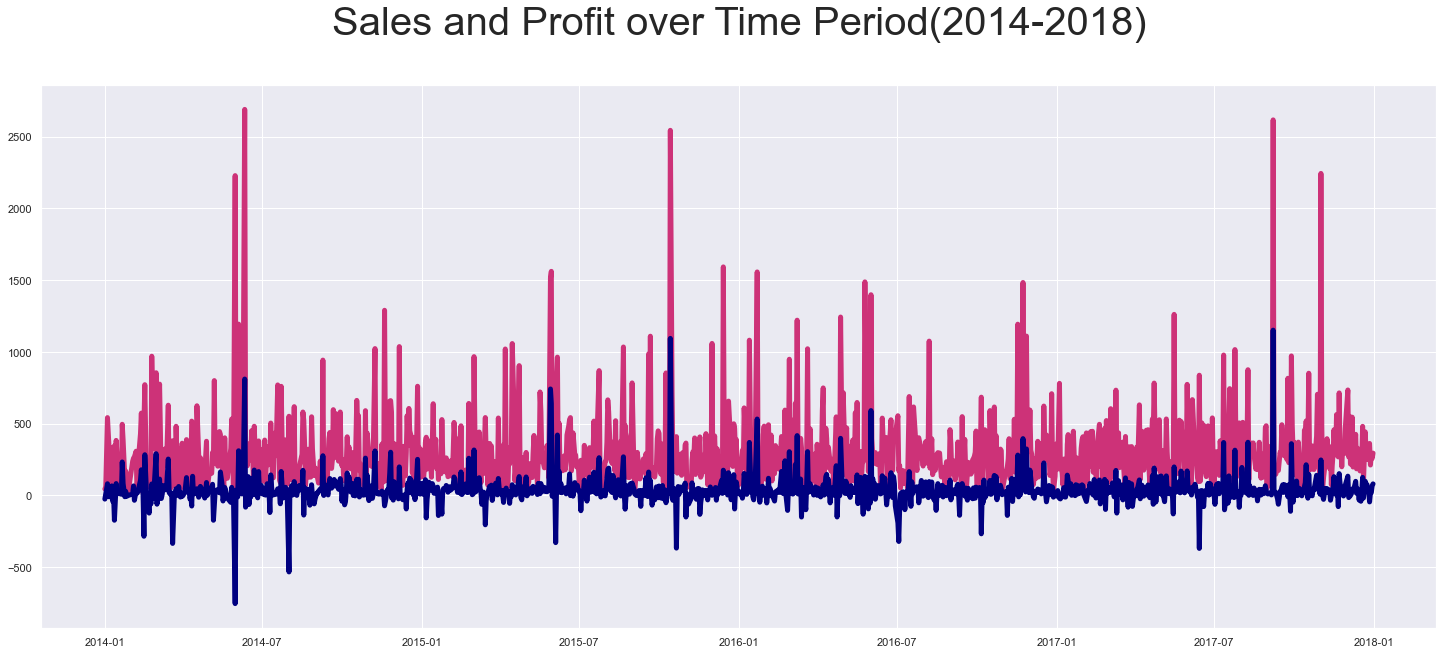

In [279]:
df_line = df[['Order Date','Sales','Profit']].sort_values('Order Date') 
df_line['Order Date'] = pd.to_datetime(df_line['Order Date'])
df_line = df_line.groupby('Order Date').mean() 

plt.figure(figsize=[25,10])
plt.plot(df_line.index, 'Sales', data=df_line, color='#CD3278', linewidth=5) 
plt.plot(df_line.index, 'Profit', data=df_line, color='#000080', linewidth=5) 
plt.title("Sales and Profit over Time Period(2014-2018)", size=40, pad=50)

plt.show()

In [41]:
# According to REgion
reg_df = df.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'})
reg_df

Sales       Profit
Region                            
Central  1.720553e+06  215534.0685
North    6.255750e+05   91779.8550
South    5.919615e+05   65515.8180

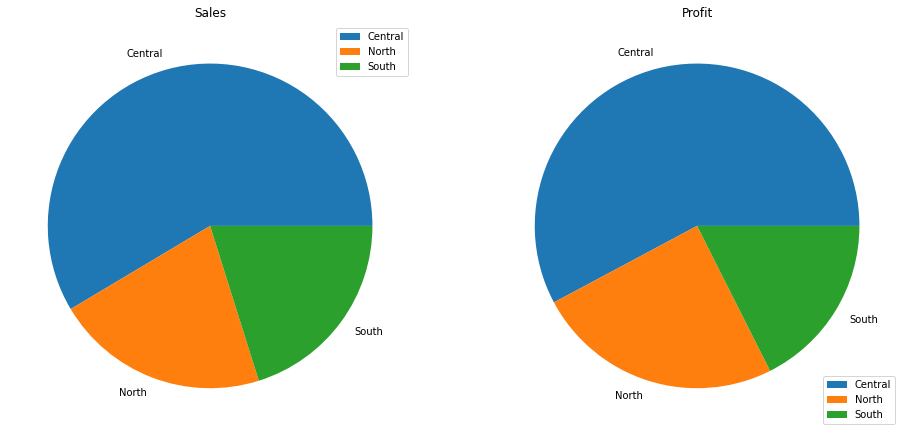

In [42]:
# Regions and their PROFIT/SALEs.

fig, axs = plt.subplots(1, 2)

S = reg_df.plot.pie(y="Sales", figsize=(16,15), ax=axs[0])
S.set_title("Sales")
P = reg_df.plot.pie(y='Profit', figsize=(16,15), ax=axs[1])
P.set_title('Profit')
S.set_ylabel(None)
P.set_ylabel(None)
plt.show()


KeyError: '2017'

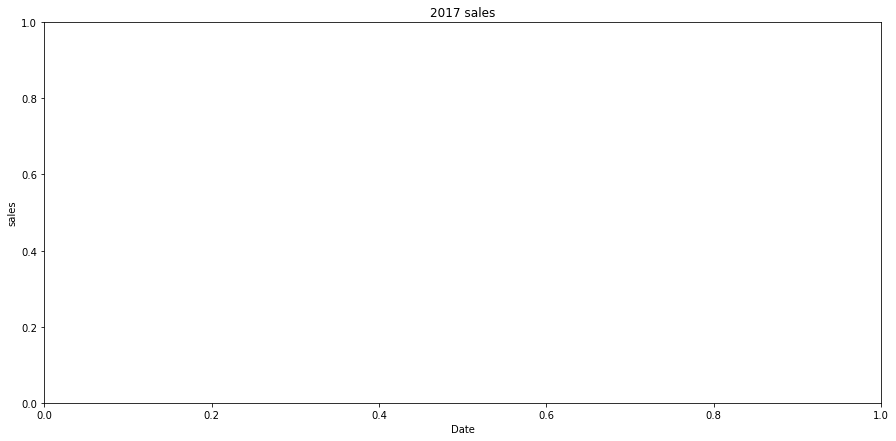

In [43]:
plt.figure(figsize=(15,7))
plt.title("2017 sales")
plt.xlabel("Date")
plt.ylabel("sales")
df.loc['2017']['Sales'].resample('W').mean().plot(style='-',color='red')
plt.legend(['mean'])
plt.show()

In [46]:
df[df['Country'] == 'France'].groupby(['Category'])['Sales'].sum()

Category
Furniture          242117.127
Office Supplies    304763.538
Technology         312050.418
Name: Sales, dtype: float64

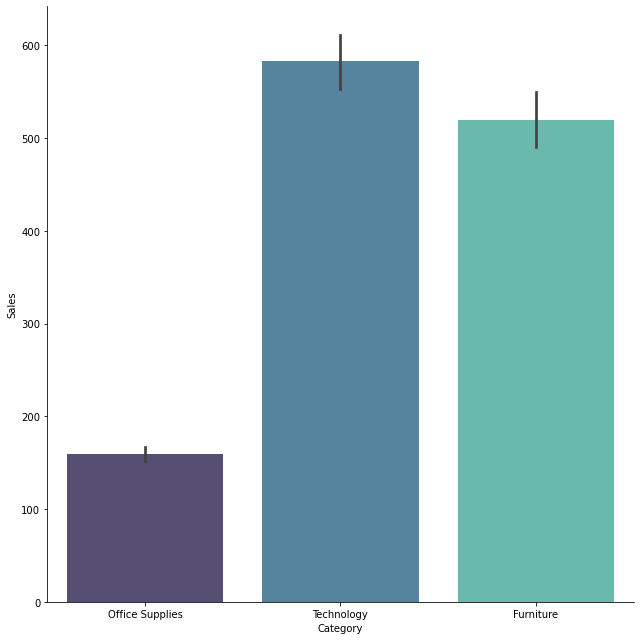

In [47]:
# plt.figure(figsize = (50, 20),dpi = 200), i can remove alpha and linewidth and height, inorder to control fig size like this.
sbn.catplot(y='Sales',x='Category',kind='bar',palette='mako',alpha=0.9,linewidth=10,height=9,data=df)


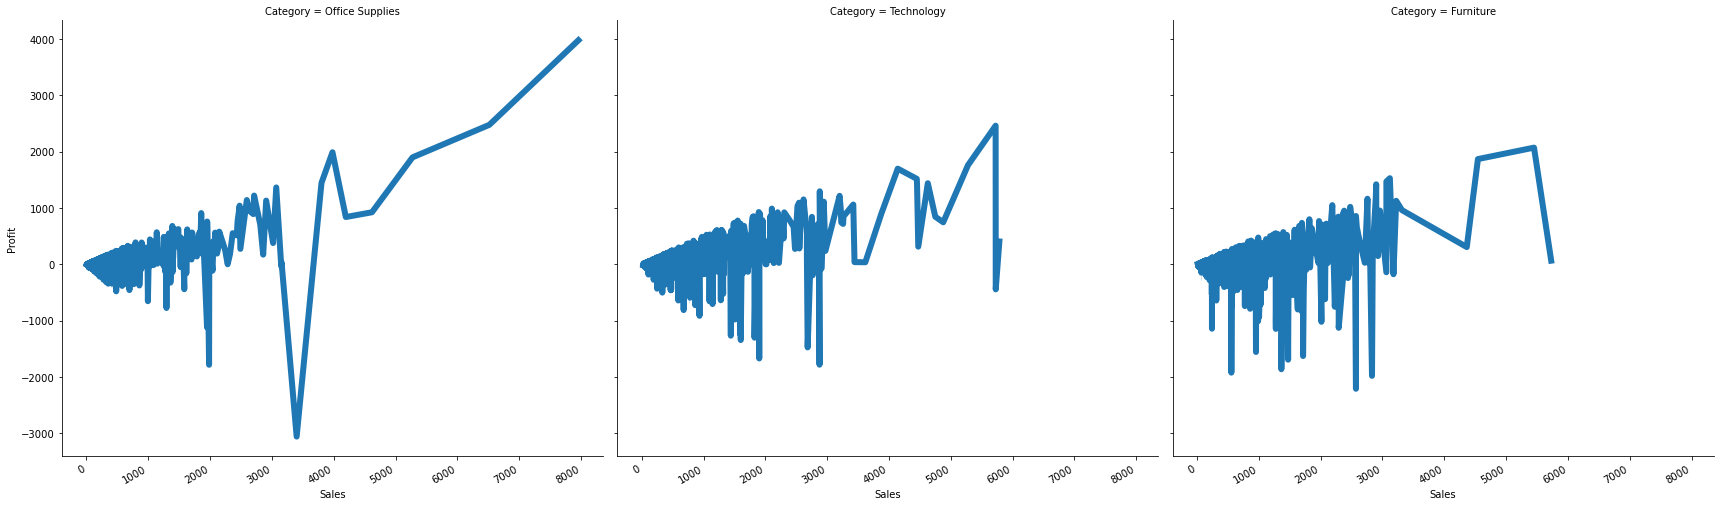

In [48]:
A = sbn.relplot(col="Category", y="Profit", kind="line",x='Sales',height=8,aspect=1,linewidth=6,data=df)
A.figure.autofmt_xdate()


In [ ]:
#it showed after a while, a colorful graph

<AxesSubplot:xlabel='Sales', ylabel='count'>

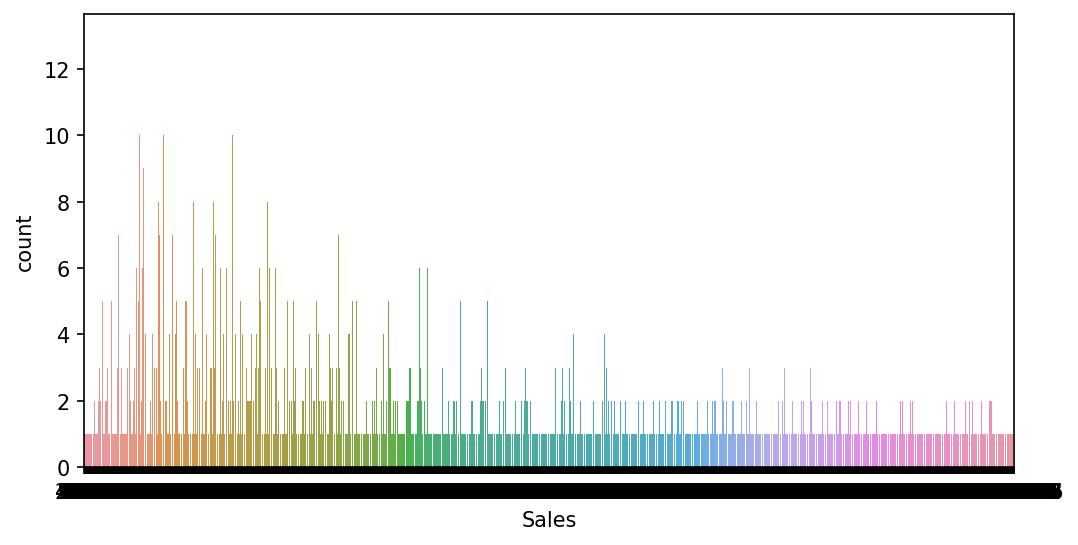

In [49]:
plt.figure(figsize = (8, 4), dpi = 150)

color_palette = sbn.color_palette("plasma")
sbn.set_palette(color_palette)

sbn.countplot(x = 'Sales', data = df)

<AxesSubplot:title={'center':'Number of Customers from Each country'}, xlabel='Customer ID', ylabel='count'>

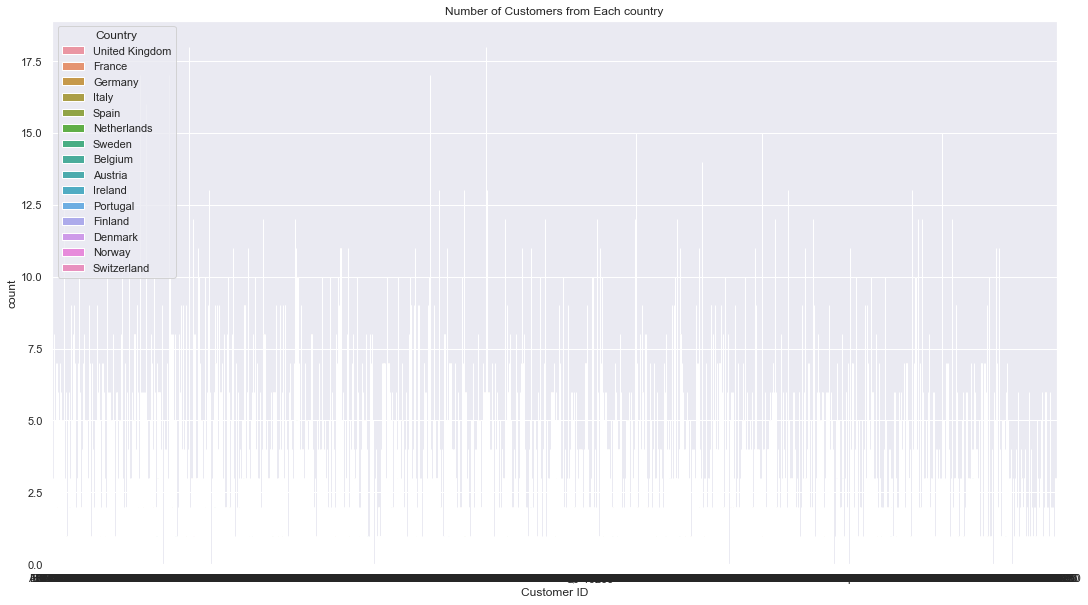

In [78]:
plt.figure(figsize = (18, 10))

plt.title("Number of Customers from Each country")

sbn.countplot(x = "Customer ID", hue= 'Country', data = df)





# HOW TO HAVE Y AXIS HERE?



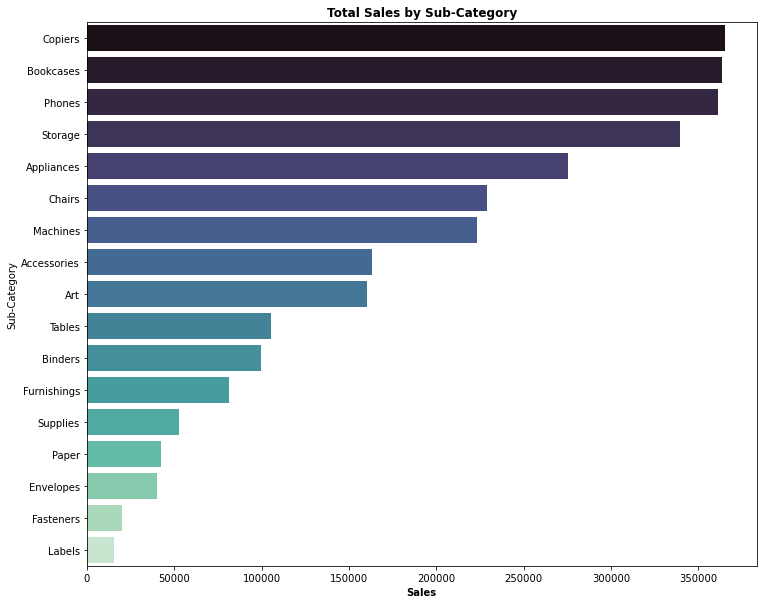

In [52]:
# sales by sub category
figure = plt.figure(figsize=(12,10))

grouped_df = df.groupby('Sub-Category').sum()[['Sales']].reset_index().sort_values(by='Sales', ascending=False)
g = sbn.barplot(x='Sales', y='Sub-Category', data=grouped_df, palette='mako')
g.set_title('Total Sales by Sub-Category',fontweight="bold")
g.set_xlabel('Sales',fontweight="bold")
plt.show(g)

In [53]:
b = df.groupby(['Country'])['Profit'].sum()
df_b = pd.DataFrame(b)
df_b.head()

df_b.sort_values(['Profit'], ascending = False).head()

Profit
Country                    
United Kingdom  111900.1500
France          109029.0030
Germany         107322.8205
Spain            54390.1200
Austria          21442.2600

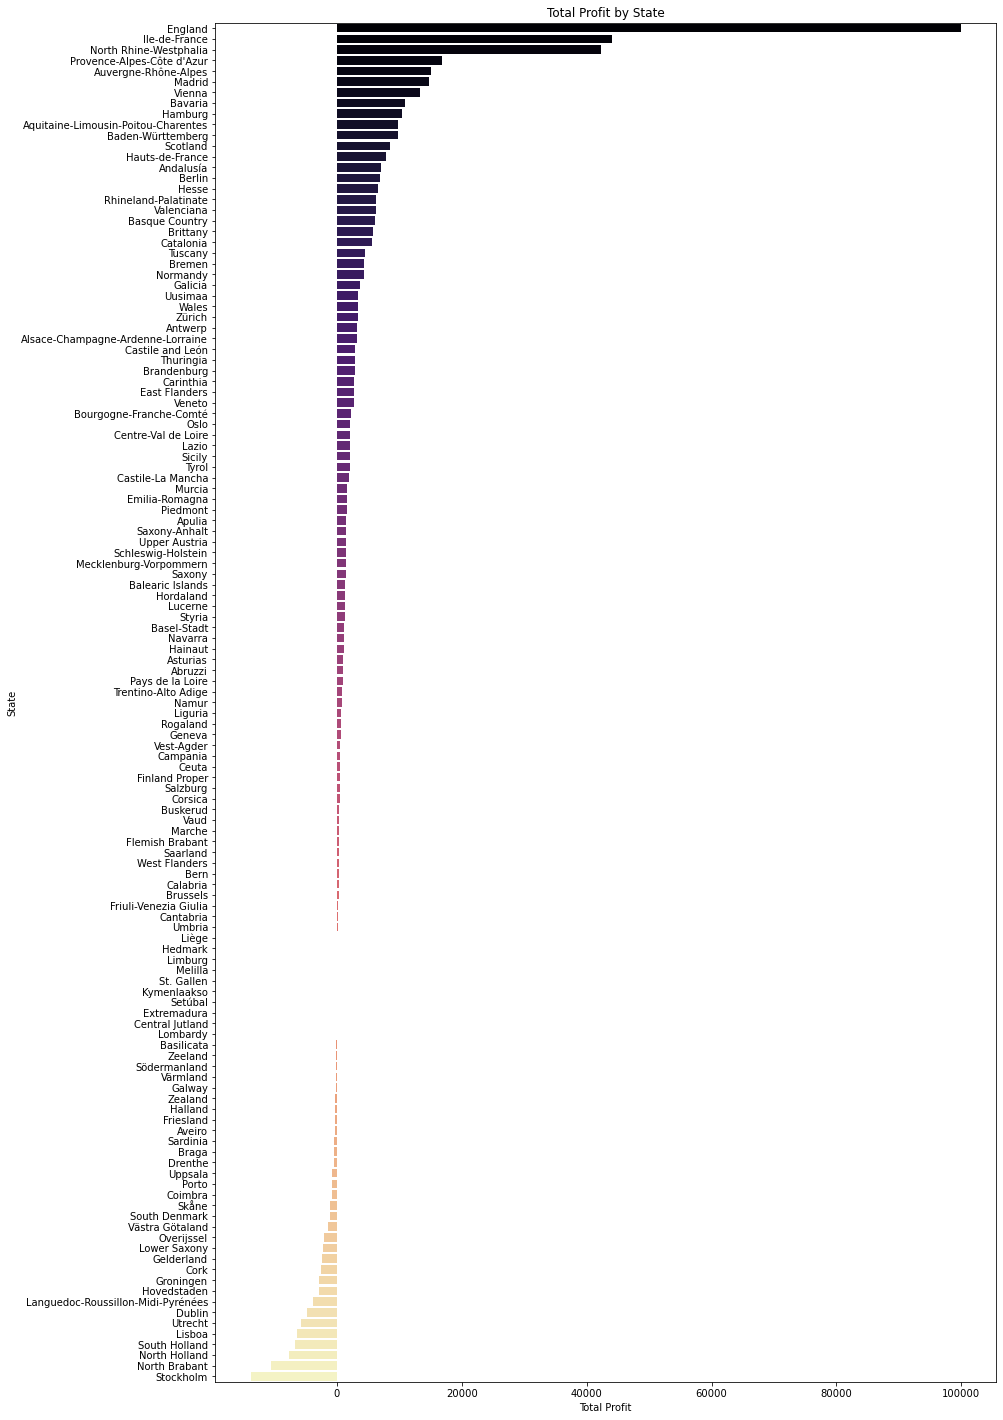

In [54]:
figure = plt.figure(figsize=(14,25))

grouped_df = df.groupby('State').sum()[['Profit']].reset_index().sort_values(by='Profit', ascending=False)
g = sbn.barplot(x='Profit', y='State', data=grouped_df, palette='magma')
g.set_title('Total Profit by State')
g.set_xlabel('Total Profit')
plt.show(g)

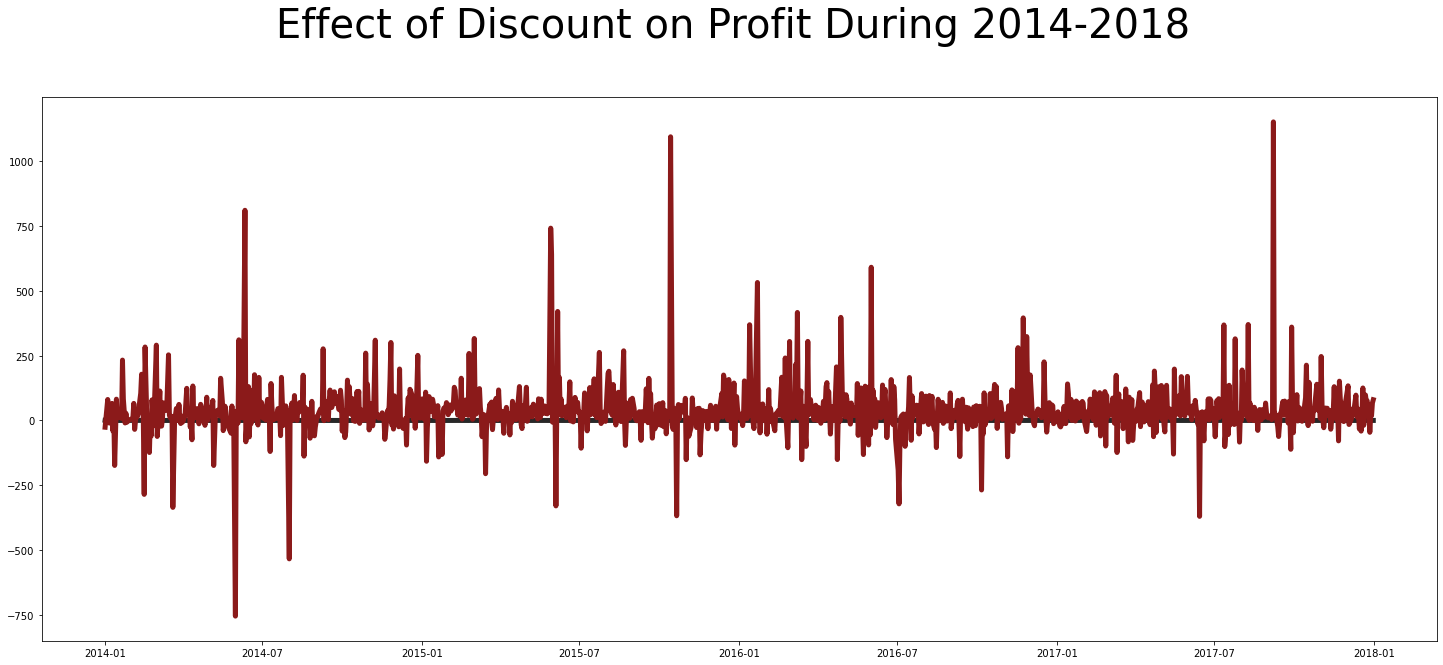

In [56]:
df_line = df[['Order Date','Discount','Profit']].sort_values('Order Date') 
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) 
df_line = df_line.groupby('Order Date').mean() 

# chart
plt.figure(figsize=[25,10])
plt.plot(df_line.index, 'Discount', data=df_line, color='#282828', linewidth=5) 
plt.plot(df_line.index, 'Profit', data=df_line, color='#8B1A1A', linewidth=5)
plt.title("Effect of Discount on Profit During 2014-2018 ", size=40, pad=60)

plt.show()

I do not understand this grapah


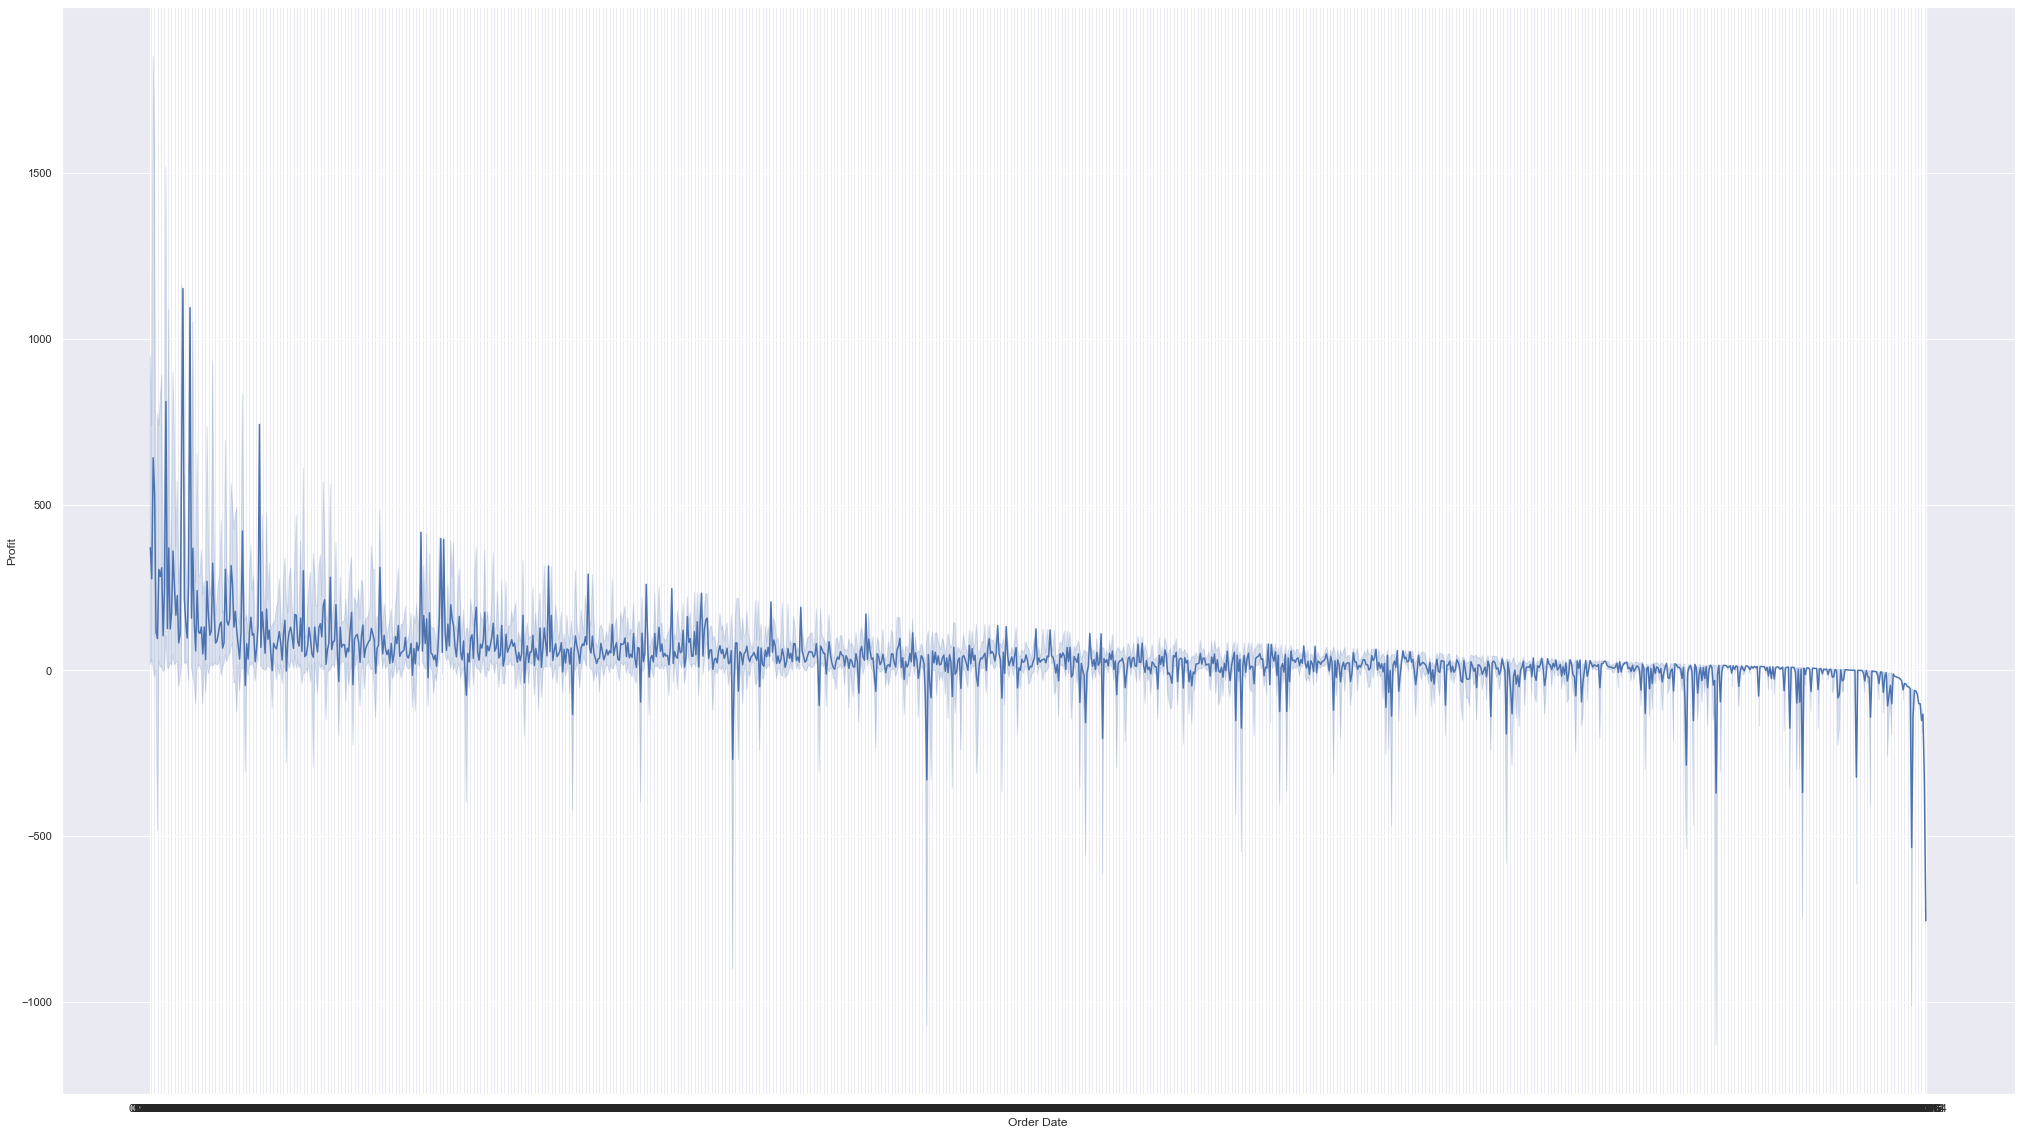

In [214]:
print('I do not understand this grapah')
plt.figure(figsize=(35,20))
sbn.lineplot(x='Order Date',y='Profit',data=df)
plt.show()

# Details of Top Profit yielding Countries( UK and France ).

In [162]:
df_UK = df[df['Country'] == 'United Kingdom']
df_UK.head(10).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'green','border': '3px solid',                       
                                    'border-color': 'black','font-weight': 'bold'})

In [57]:
df_France = df[df['Country'] == 'France']

In [58]:
df_France.head(10).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'green','border': '3px solid',                       
                                    'border-color': 'black','font-weight': 'bold'})

In [59]:
b = df_France.groupby(['State'])['Profit'].sum()
df_b = pd.DataFrame(b)
df_b.head()

df_b.sort_values(['Profit'], ascending = False).head()

Profit
State                                          
Ile-de-France                        44055.9240
Provence-Alpes-Côte d'Azur           16858.0515
Auvergne-Rhône-Alpes                 15085.1265
Aquitaine-Limousin-Poitou-Charentes   9834.5460
Hauts-de-France                       7890.3750

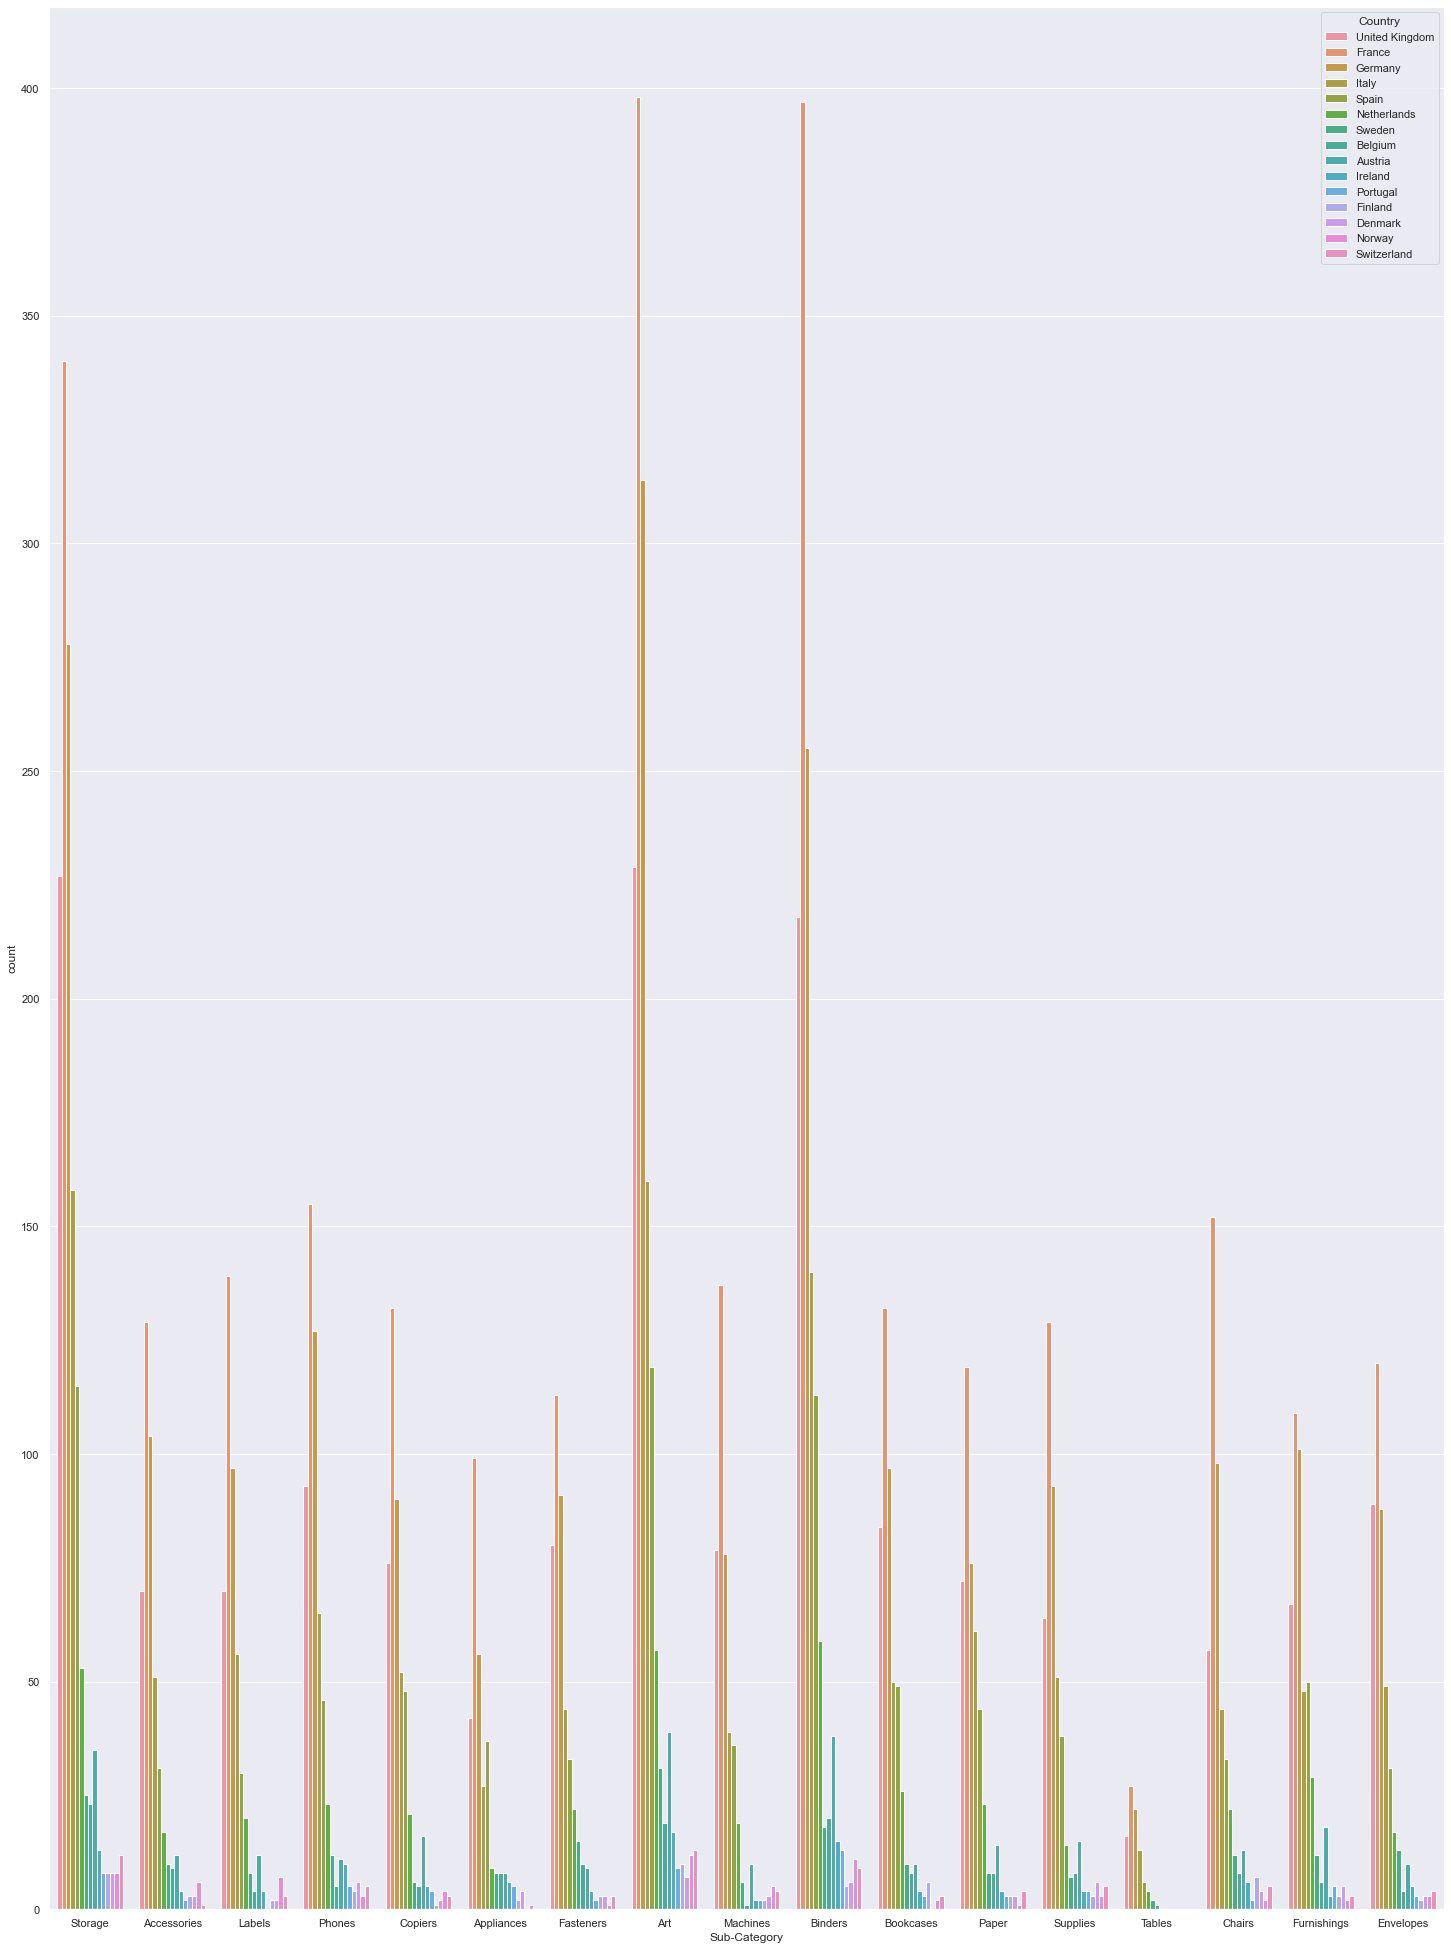

In [62]:
sbn.countplot(x = 'Sub-Category', data = df, hue= 'Country')
sbn.set(rc={'figure.figsize':(25,30)})


# Shipping data

In [63]:
df.groupby(['State']).head().style.hide_index().hide_columns(['Row ID','Order ID','Order Date','Ship Date',
                                             'Customer ID','Customer Name','Segment','City','Region','Product ID',
                                            'Category','Sub-Category','Product Name','Sales',
                                             'Quantity','Discount','Profit'])


In [ ]:
#dropping column

In [ ]:
#df1=.drop(columns='Orderd ID: 0')


In [ ]:
#df.head()

In [ ]:
#CREATION OF ENTIRELY NEW COLUMN, AND CONVERTING THE CURRENCY TO EUR FROM INR.
#df["Profit Percent"] = df['Profit']/100

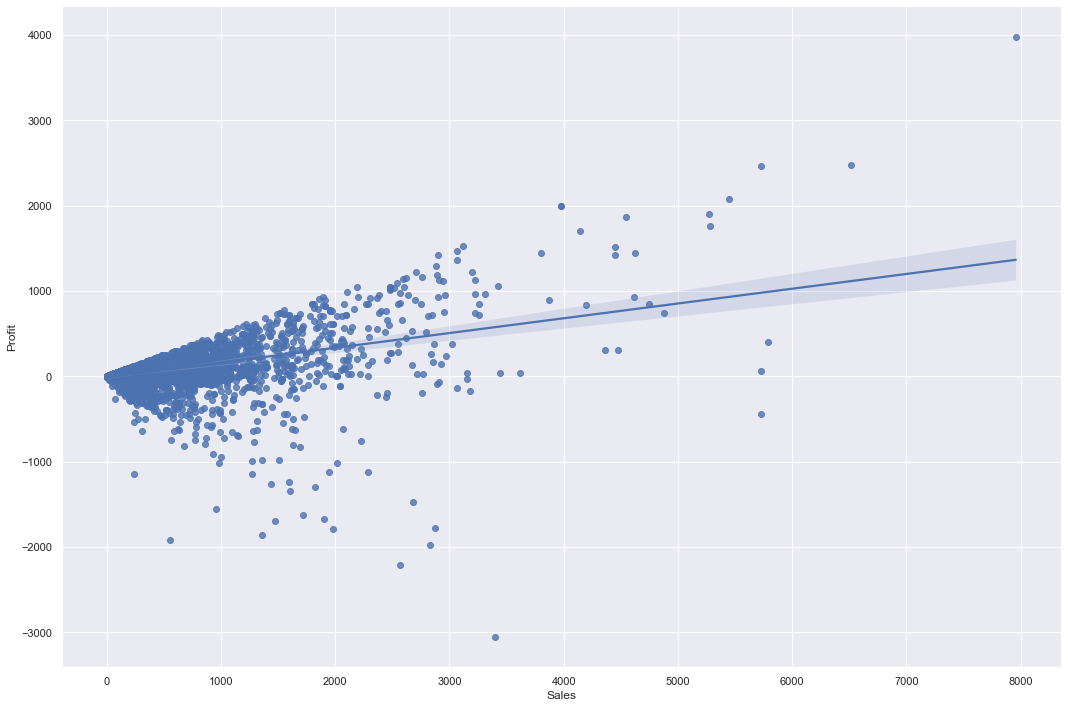

In [71]:
sbn.lmplot(data=df, x="Sales", y="Profit",
              height=10, aspect=1.5)

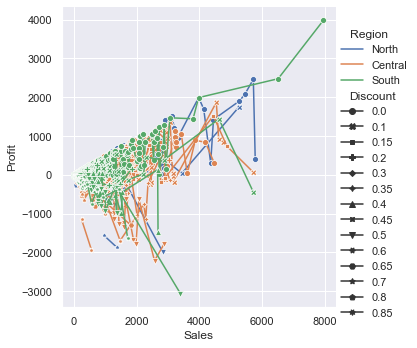

In [65]:
sbn.relplot(x="Sales", y="Profit", hue="Region", style="Discount",
            dashes=False, markers=True, kind="line", data=df);

In [66]:
print(df['Sales'].mean(),2) # average

293.80890615000146 2


In [ ]:
# AFTER CLASS

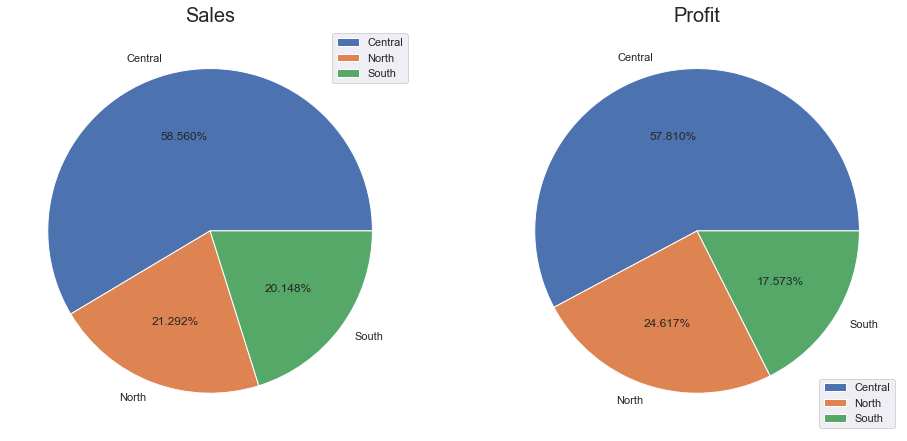

In [124]:
# Regions and their PROFIT/SALEs.

fig, axs = plt.subplots(1, 2)

S = reg_df.plot.pie(y="Sales", figsize=(16,15), ax=axs[0],  autopct = '%1.3f%%') 
S.set_title("Sales",fontsize=20)
P = reg_df.plot.pie(y='Profit', figsize=(16,15), ax=axs[1],  autopct = '%1.3f%%')
P.set_title('Profit',fontsize=20)
S.set_ylabel(None)
P.set_ylabel(None)
plt.show()
#autopct = '%1.3f%%' sir vinil taught this, .3 makes how many numbers you want after DECIMAL 

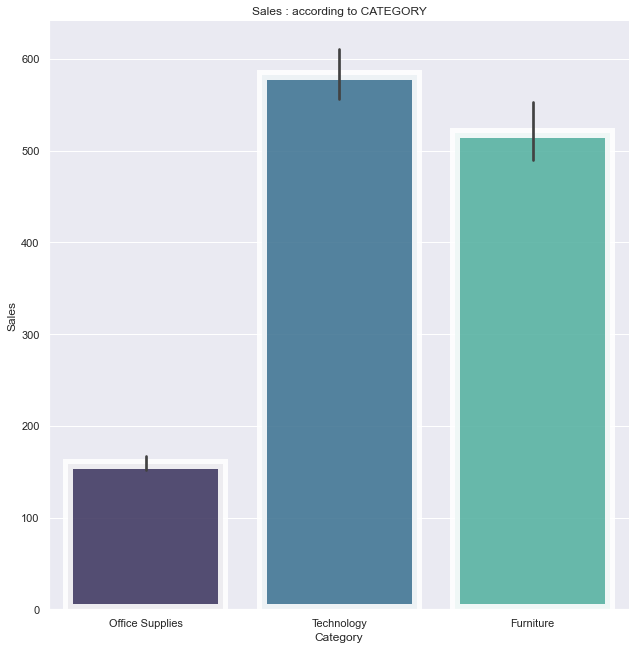

In [126]:
sbn.catplot(y='Sales',x='Category',kind='bar',palette='mako',alpha=0.9,linewidth=10,height=9,data=df).set(title="Sales : according to CATEGORY")


# Country, Category and their Profit and Sales Description 

In [210]:
df_sales = pd.pivot_table(df, index = ['Country','Category']).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'blue','border': '3px solid',                       
                                    'border-color': 'black','font-weight': 'bold'}).highlight_max(color = 'green').highlight_min(color = 'red').hide_columns(['Row ID'])
df_sales

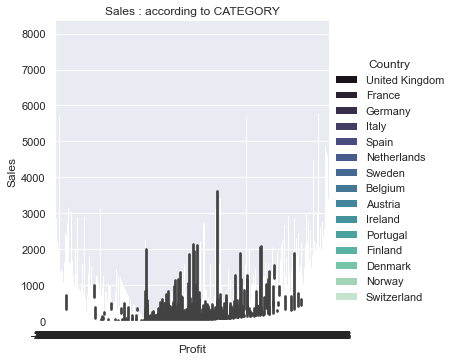

In [171]:
sbn.catplot(y='Sales',x='Profit',hue = 'Country',kind='bar',palette='mako',data=df).set(title="Sales : according to CATEGORY")


# Top Customers.

In [195]:
df.nlargest(n=5, columns=['Profit']).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'green','border': '3px solid',                       
                                    'border-color': 'black','font-weight': 'bold'})



In [ ]:
# df.nlargest(n, columns)

In [244]:
from datetime import datetime, date
datetime.strptime('07/28/2014 18:54:55.099000', '%m/%d/%Y %H:%M:%S.%f')



datetime.datetime(2014, 7, 28, 18, 54, 55, 99000)

In [246]:
from datetime import datetime

a = datetime.strptime("3/11/2022", "%m/%d/%Y")
b = datetime.strptime("3/18/2022", "%m/%d/%Y")
a>b
False

False

In [261]:
# converting date to datetime format
date = []
for d in df['Order Date']:
    x = datetime.strptime(d, '%d/%m/%y')
    date.append(x)
df['my_date'] = date

In [262]:
print(df['my_date'][0].month)
print(df['my_date'][0].day)
print(df['my_date'][0].year)


2
7
2017


In [266]:
# converting datetime to individual columns
day = []
month = []
year = []
for i in df['my_date']:
    day.append(i.day)
    month.append(i.month)
    year.append(i.year)
df['day'] = day
df['month'] = month
df['year'] = year
df.head(2)

Row ID         Order ID Order Date Ship Date       Ship Mode  \
1774       1  ES-2017-1651774   08/09/17  14/09/17  Standard Class   
3265       1  ES-2014-3248922   09/09/14  12/09/14    Second Class   

     Customer ID      Customer Name    Segment   City    State  ...  \
1774    PJ-18835      Patrick Jones  Corporate  Prato  Tuscany  ...   
3265    ER-13855  Elpida Rittenbach  Corporate   Lugo  Galicia  ...   

     Sub-Category                  Product Name    Sales Quantity Discount  \
1774   Appliances             Hoover Stove, Red  7958.58       14      0.0   
3265   Appliances  Hamilton Beach Stove, Silver  6517.08       12      0.0   

       Profit    my_date  day  month  year  
1774  3979.08 2017-09-08    8      9  2017  
3265  2476.44 2014-09-09    9      9  2014  

[2 rows x 24 columns]

year
2014    1653
2015    2242
2016    2577
2017    3528
dtype: int64


Text(0.5, 1.0, 'Yearly sales analysis')

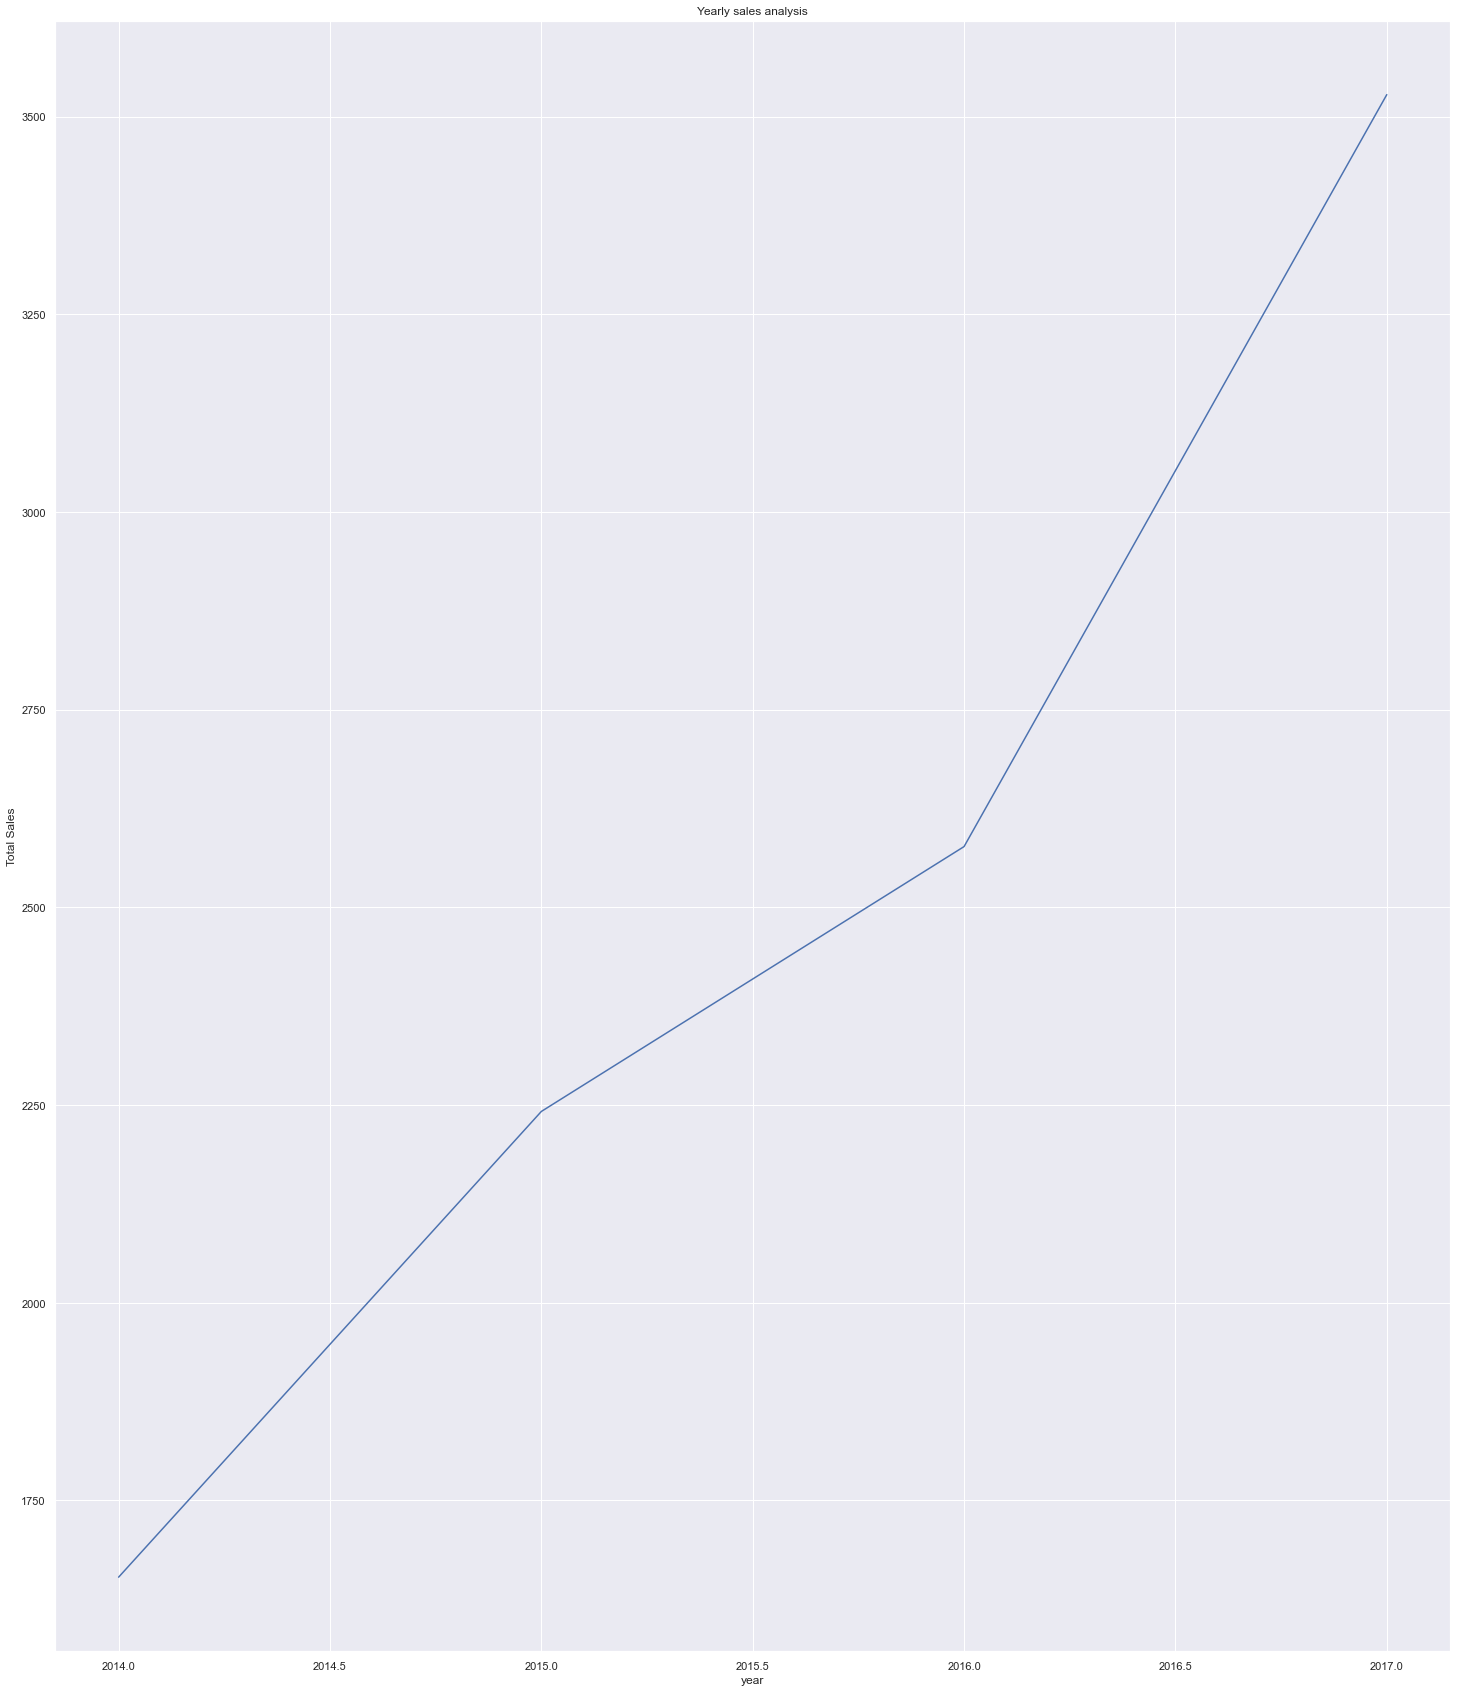

In [270]:
#sale by year
sales_by_year = df.groupby('year').size()
print(sales_by_year)
#Plotting the Graph
plot_by_year = sales_by_year.plot(title='yearly Sales')
plot_by_year.set_xlabel('year')
plot_by_year.set_ylabel('Total Sales')
plt.title("Yearly sales analysis")

Yearly Profit graph


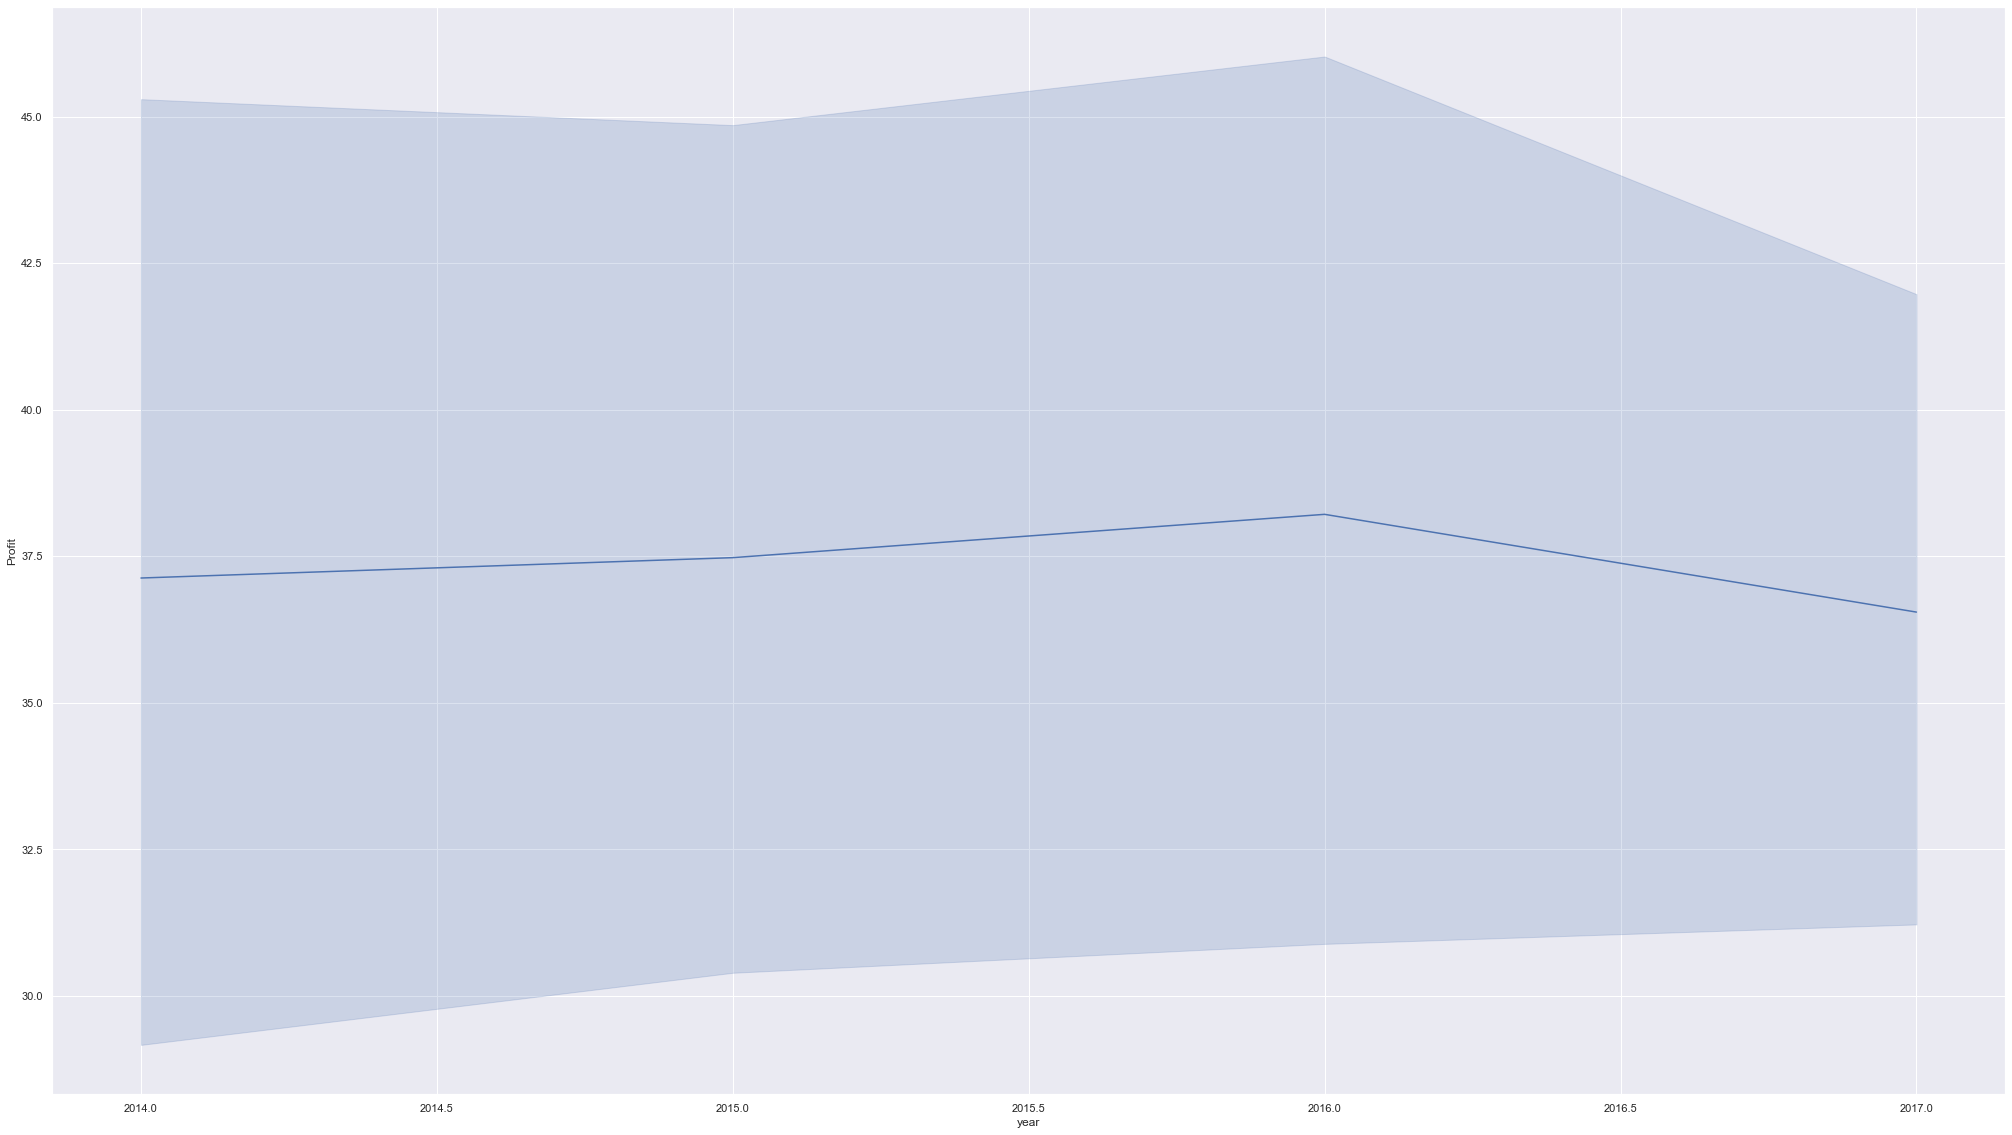

In [282]:
print('Yearly Profit graph')
plt.figure(figsize=(35,20))
sbn.lineplot(x='year',y='Profit',data=df)
plt.show()

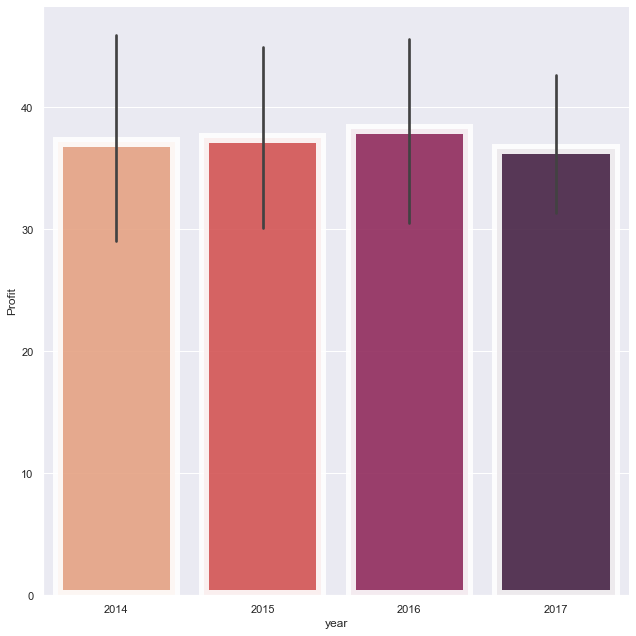

In [277]:
# plt.figure(figsize = (50, 20),dpi = 200), i can remove alpha and linewidth and height, inorder to control fig size like this.
sbn.catplot(y='Profit',x='year',kind='bar',palette='rocket_r',alpha=0.9,linewidth=10,height=9,data=df)


In [228]:
customers = list(df['Customer Name'].value_counts()[:10].index)
filters = df['Customer Name'].isin(customers)
A = df[filters]

In [232]:
colors = sbn.color_palette('pastel')[0:]


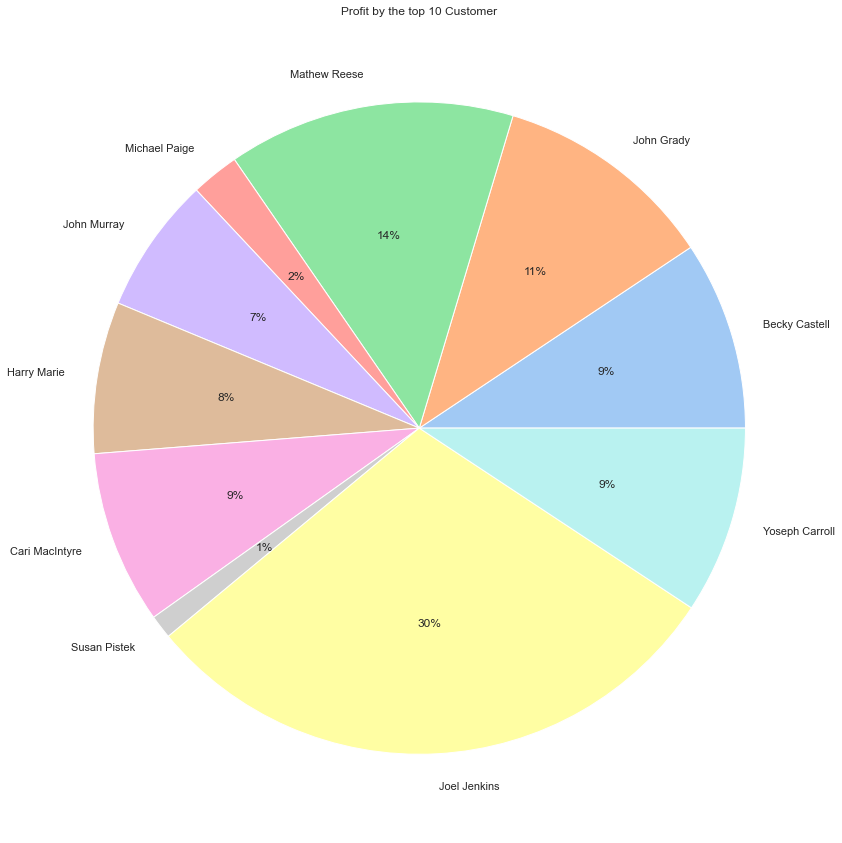

In [283]:
plt.figure(figsize=(15,15))
values = A.groupby('Customer Name')['Profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Profit by the top 10 Customer")
plt.show()

# Conclusion

In [276]:
a ="""
\033[1m \x1b[32m
1. Most Profitable country is United Kingdom
2. Most Sales occured in France
3. State wise, England gave the highest Profit
4. Discounts had no significant affect on Sales.
5. Year 2014 was the most Profitable, with 2017 being the second
6. Top 5 customers are : Joel Jenkins, Methew Reese, John Grady, Becky Castell, Yoseph Carroll.
7. Most Profitable Category is Office Supplies.
8. Though Sales had increased by the year 2017, Profit dindt rise accordingly.
"""

print(a)


 
1. Most Profitable country is United Kingdom
2. Most Sales occured in France
3. State wise, England gave the highest Profit
4. Discounts had no significant affect on Sales.
5. Year 2014 was the most Profitable, with 2017 being the second
6. Top 5 customers are : Joel Jenkins, Methew Reese, John Grady, Becky Castell, Yoseph Carroll.
7. Most Profitable Category is Office Supplies.
8. Though Sales had increased by the year 2017, Profit dindt rise accordingly.

